In [4]:
import zipfile
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from google.colab import files
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import img_to_array, load_img

In [1]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-03-07 15:01:31--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  68.5MB/s    in 2.1s    

2024-03-07 15:01:33 (68.5 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-03-07 15:01:38--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2024-03-07 15:01:38 (109 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [5]:
train_zip = "./horse-or-human.zip"
train_zip_ref = zipfile.ZipFile( train_zip, "r")
train_zip_ref.extractall( "./horse-or-human")
train_zip_ref.close()

test_zip = "./validation-horse-or-human.zip"
test_zip_ref = zipfile.ZipFile( test_zip, "r")
test_zip_ref.extractall( "./validation-horse-or-human")
test_zip_ref.close()

In [6]:
train_horse_dir = os.path.join( "./horse-or-human/horses/")
train_human_dir = os.path.join( "./horse-or-human/humans")

test_horse_dir = os.path.join( "./validation-horse-or-human/horses/")
test_human_dir = os.path.join( "./validation-horse-or-human/humans")

In [7]:
train_horse_names = os.listdir( train_horse_dir)
print( f"Train Set Horses: { train_horse_names[ :10]}")

train_human_names = os.listdir( train_human_dir)
print( f"Train Set Humans: { train_human_names[ :10]}")

test_horse_names = os.listdir( test_horse_dir)
print( f"Test Set Horses: { test_horse_names[ :10]}")

test_human_names = os.listdir( test_human_dir)
print( f"Test Set Humans: { test_human_names[ :10]}")

Train Set Horses: ['horse30-1.png', 'horse10-6.png', 'horse30-0.png', 'horse49-5.png', 'horse34-0.png', 'horse44-0.png', 'horse06-9.png', 'horse19-7.png', 'horse42-0.png', 'horse14-2.png']
Train Set Humans: ['human14-28.png', 'human15-28.png', 'human16-06.png', 'human12-08.png', 'human09-25.png', 'human06-29.png', 'human15-04.png', 'human04-20.png', 'human16-00.png', 'human17-18.png']
Test Set Horses: ['horse2-201.png', 'horse5-458.png', 'horse2-254.png', 'horse6-089.png', 'horse2-383.png', 'horse2-294.png', 'horse2-368.png', 'horse5-235.png', 'horse4-501.png', 'horse3-326.png']
Test Set Humans: ['valhuman04-08.png', 'valhuman02-00.png', 'valhuman01-08.png', 'valhuman03-09.png', 'valhuman02-08.png', 'valhuman04-15.png', 'valhuman02-13.png', 'valhuman05-25.png', 'valhuman01-24.png', 'valhuman02-15.png']


In [8]:
print( f"Total training horse images: { len( os.listdir( train_horse_dir))}")
print( f"Total training human images: { len( os.listdir( train_human_dir))}")
print( f"Total test horse images: { len( os.listdir( test_horse_dir))}")
print( f"Total test horse images: { len( os.listdir( test_human_dir))}")

Total training horse images: 500
Total training human images: 527
Total test horse images: 128
Total test horse images: 128


In [9]:
nrows = 4
ncols = 4

pic_index = 0

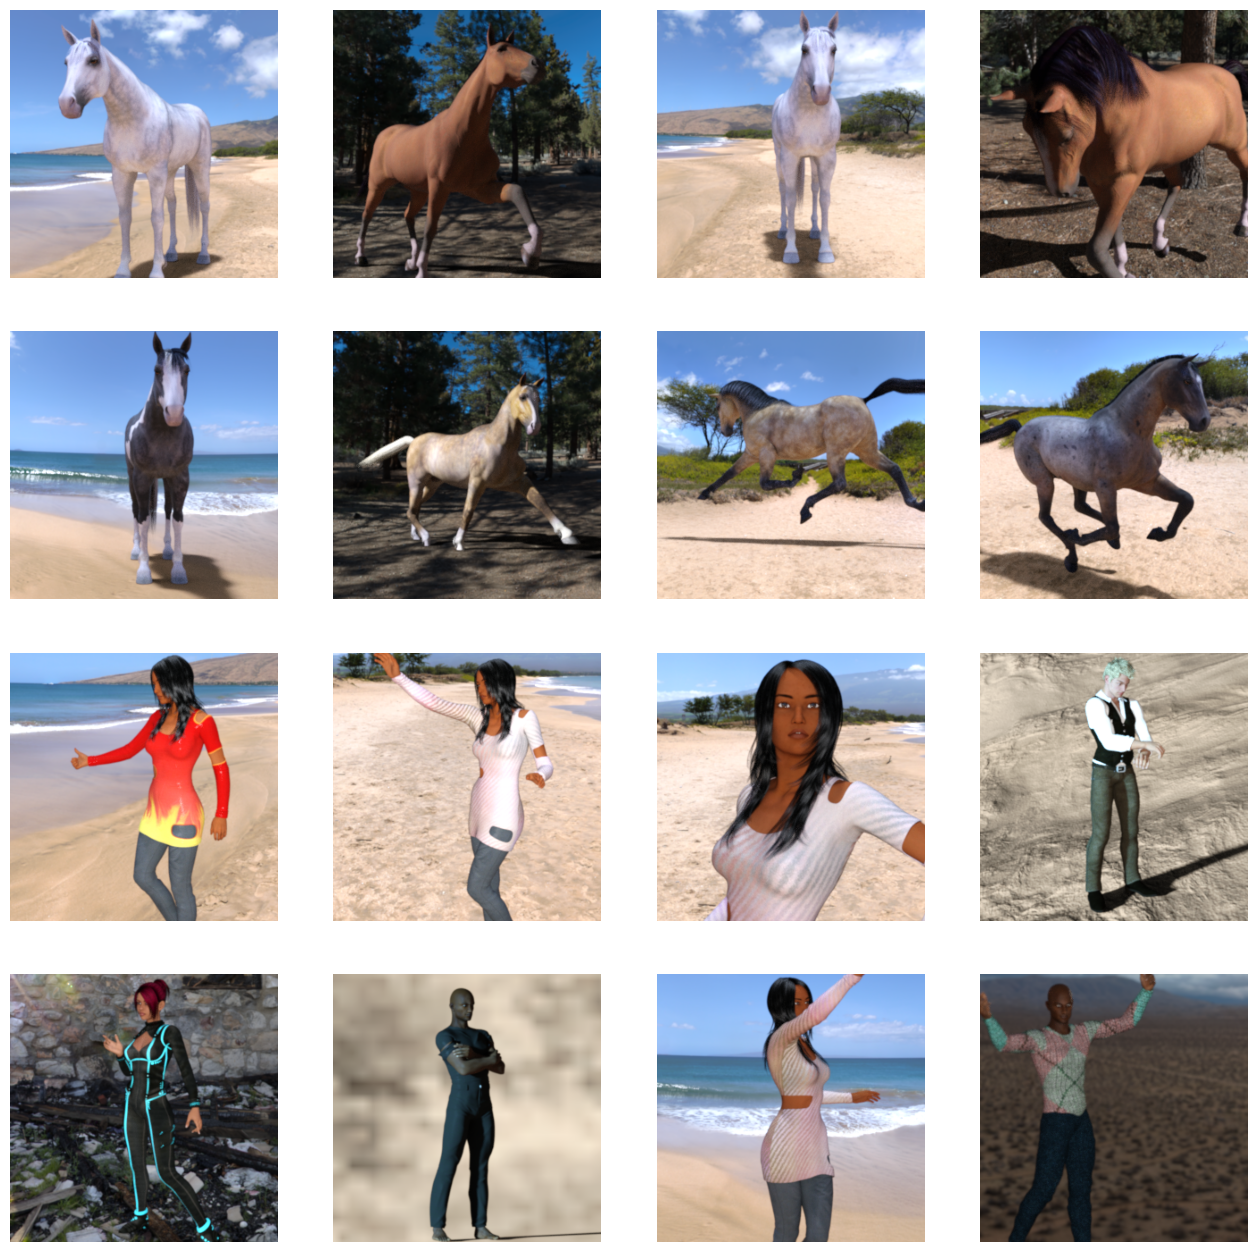

In [10]:
fig = plt.gcf()
fig.set_size_inches( ncols * 4, nrows * 4)

pic_index += 8

next_horse_pix = [ os.path.join( train_horse_dir, fname) for fname in train_horse_names[ pic_index - 8:pic_index]]
next_human_pix = [ os.path.join( train_human_dir, fname) for fname in train_human_names[ pic_index - 8:pic_index]]

for i, img_path in enumerate( next_horse_pix + next_human_pix):
    sp = plt.subplot( nrows, ncols, i + 1)
    sp.axis( "Off")

    img = mpimg.imread( img_path)
    plt.imshow( img)

plt.show()

In [11]:
model = tf.keras.models.Sequential( [
    tf.keras.layers.Conv2D( 16, ( 3, 3), activation="relu", input_shape=( 300, 300, 3)),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 32, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 64, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 64, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 64, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense( 512, activation="relu"),
    tf.keras.layers.Dense( 1, activation="sigmoid")
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [13]:
model.compile(
    loss="binary_crossentropy",
    optimizer=RMSprop( learning_rate=0.001),
    metrics=[ "accuracy"]
)

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator( rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    "./horse-or-human",
    target_size=( 300, 300),
    batch_size=128,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    "./validation-horse-or-human",
    target_size=( 300, 300),
    batch_size=32,
    class_mode="binary"
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=test_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 41s 4s/step - loss: 0.7171 - accuracy: 0.5083 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 35s 4s/step - loss: 0.6870 - accuracy: 0.5539 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 24s 3s/step - loss: 0.6436 - accuracy: 0.6474 - val_loss: 0.7749 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 27s 3s/step - loss: 0.6173 - accuracy: 0.6830 - val_loss: 0.7661 - val_accuracy: 0.5156
Epoch 5/15
8/8 [==============================] - 25s 3s/step - loss: 0.5920 - accuracy: 0.6885 - val_loss: 0.7652 - val_accuracy: 0.5000
Epoch 6/15
8/8 [==============================] - 27s 3s/step - loss: 0.6164 - accuracy: 0.6436 - val_loss: 0.6983 - val_accuracy: 0.5312
Epoch 7/15
8/8 [==============================] - 24s 3s/step - loss: 0.6515 - accuracy: 0.7008 - val_loss: 1.0175 - val_accuracy: 0.5000
Epoch 8/15
8/8 [==================

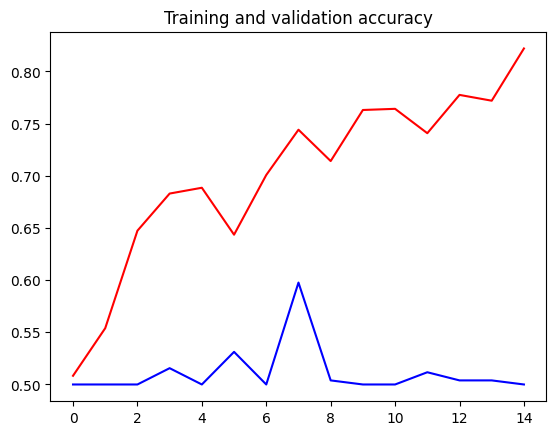

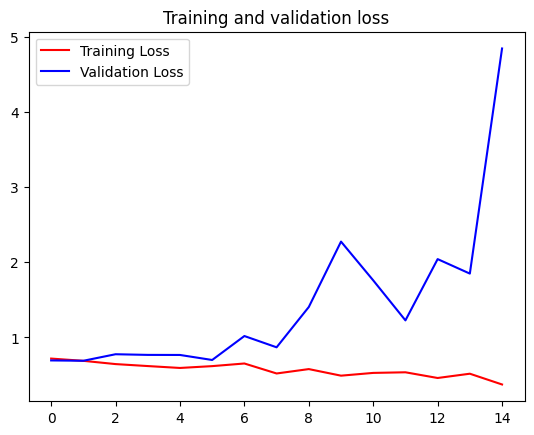

In [16]:
acc = history.history[ "accuracy"]
val_acc = history.history[ "val_accuracy"]
loss = history.history[ "loss"]
val_loss = history.history[ "val_loss"]

epochs = range( len( acc))

plt.plot( epochs, acc, "r", label="Training accuracy")
plt.plot( epochs, val_acc, "b", label="Validation accuracy")
plt.title( "Training and validation accuracy")

plt.figure()

plt.plot( epochs, loss, "r", label="Training Loss")
plt.plot( epochs, val_loss, "b", label="Validation Loss")
plt.title( "Training and validation loss")
plt.legend()

plt.show()